In [1]:
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

import numpy as np

from matplotlib import pyplot as plt

from scipy import ndimage as nd

In [3]:
img_0 = img_as_float(io.imread("demo.jpg"))

In [4]:
img_1 = img_as_float(io.imread("demo1.jpg"))

# Applying Guassian Filter For Denoising

In [15]:
gaussian_img_0 = nd.gaussian_filter(img_0, sigma=1)
plt.imsave("gaussian_0.jpg", gaussian_img_0)

In [16]:
gaussian_img_1 = nd.gaussian_filter(img_1, sigma=1)
plt.imsave("gaussian_1.jpg", gaussian_img_1)

# Applying Median Filter For Denoising

In [24]:
median_img_0 = nd.median_filter(img_0, size=2)
plt.imsave("median_0.jpg",median_img_0)

In [25]:
median_img_1 = nd.median_filter(img_1, size=2)
plt.imsave("median_1.jpg", median_img_1)

# Applying NLM 
## (Non Local Mean)(Denoising)

In [60]:
sigma_est = np.mean(estimate_sigma(img_1, multichannel=True))

In [61]:
#print(sigma_est)

In [62]:
#sigma_est=0.89

In [63]:
patch_kw = dict(patch_size=10,patch_distance=3,multichannel=True)

In [64]:
denoise_img = denoise_nl_means(img_1, h=1.15 * sigma_est, fast_mode=False,patch_size=5, patch_distance=3, multichannel=True)

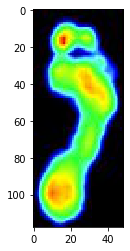

In [65]:
plt.imshow(denoise_img)

In [66]:
plt.imsave("denoise1.jpg",denoise_img)

In [54]:
denoise_img_1= denoise_nl_means(img_0, h=1.15 * sigma_est, fast_mode=False,**patch_kw)

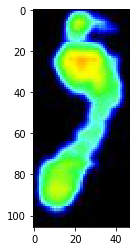

In [55]:
plt.imshow(denoise_img_1)

In [58]:
denoise2_fast = denoise_nl_means(img_0, h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True, **patch_kw)

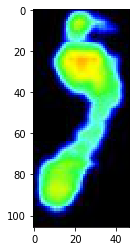

In [59]:
plt.imshow(denoise2_fast)